In [120]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
from skimage import io
from scipy import misc
from skimage.transform import rescale, resize, downscale_local_mean
import  scipy
import  scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from os import listdir
from os.path import isdir,isfile,join
import matplotlib

from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import find_peaks

In [121]:
#return baseline. Method "Asymmetric Least Squares Smoothing" by P. Eilers and H. Boelens in 2005
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return(z)
#return an array divided by the maximum elements in the given array
def normalized(y, max_y = 1):
    z = y/np.amax(y)
    return(z)

# A26f-ab

In [122]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200322/a26fgal445fg6m/

/media/yingtao/Liu_IO_2/imaging_2020/20200322/a26fgal445fg6m


In [123]:
ls

49-Results.csv*  liu_dual48.txt*  liu_dual50.txt*  RoiSet_49.zip*
liu_dual46.tif*  liu_dual49.tif*  Results_46.csv*
liu_dual46.txt*  liu_dual49.txt*  Results_49.csv*
liu_dual48.tif*  liu_dual50.tif*  RoiSet_46.zip*


In [124]:
segments= []
with open("Results_49.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [125]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=80, height=(0.2,1))

/home/yingtao/anaconda3/envs/caiman/lib/python3.7/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "Best". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


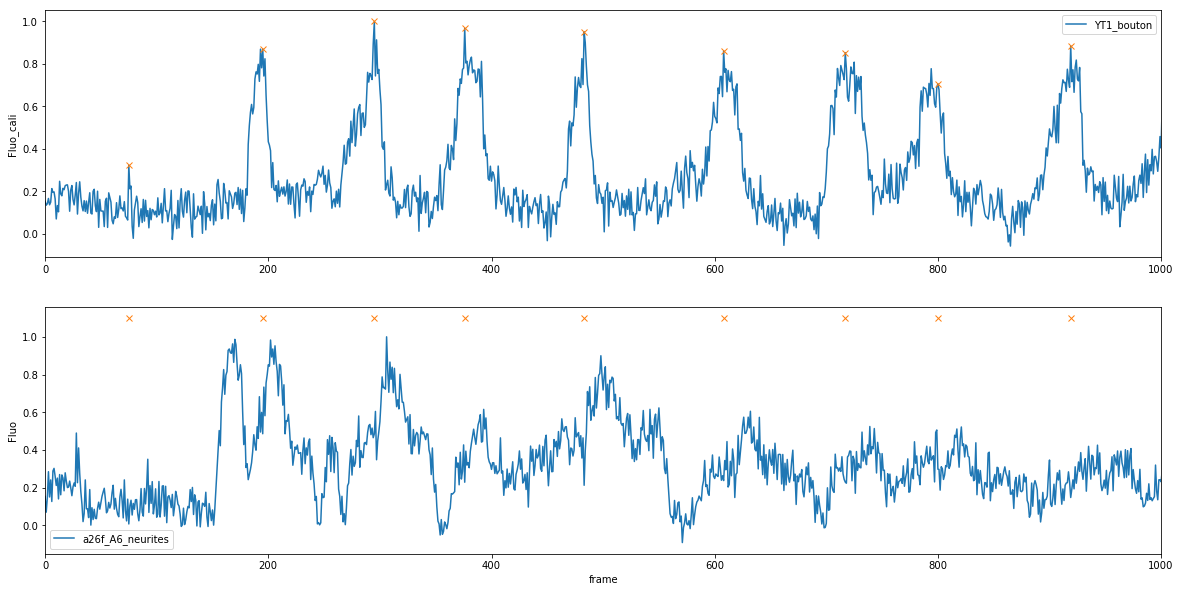

In [126]:
slice_i = 0
slice_e = 1000
plt.figure(2,figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='YT1_bouton')
plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
#plt.xlabel('frame')
plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(1):
    plt.plot(segments_normed[i+1,], label='a26f_A'+str(6-i)+'_neurites')
plt.plot(peaks_axon,[1.1,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.xlabel('frame')
plt.ylabel('Fluo')
plt.legend(loc='Best')
plt.show()

In [127]:
peaks_axon

array([  75,  195,  295,  376,  483,  608,  717,  800,  919, 1014, 1095,
       1178, 1263])

In [128]:
peaks_axon

array([  75,  195,  295,  376,  483,  608,  717,  800,  919, 1014, 1095,
       1178, 1263])

In [129]:
peaks = peaks_axon[1:7]

In [130]:
def get_traces(peaks,signal,n=100):
    traces = []
    for i in peaks:
        traces.append([(np.arange(int(2*n))-n),signal[i-int(n):i+int(n)]])
    return(traces)

In [131]:
trace_a26f = [get_traces(peaks, segments_normed[1], 50),]
trace_a31c = [get_traces(peaks, segments_normed[0], 50),]

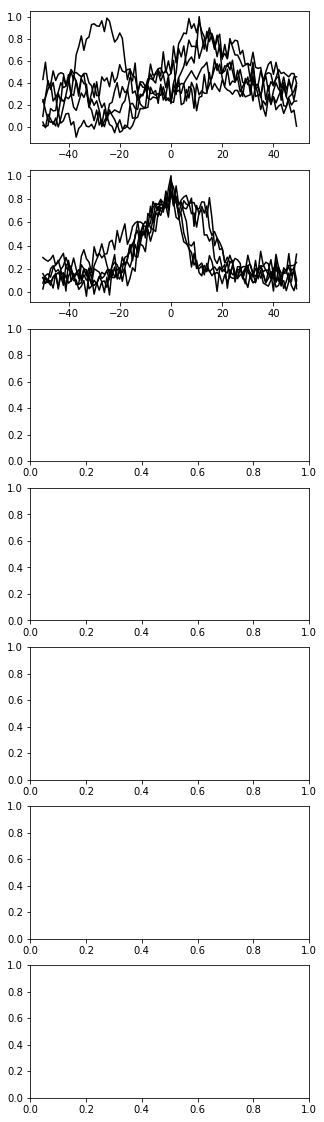

In [132]:
fig, axs = plt.subplots(7, 1,figsize=(5,20))
for num,i in enumerate(trace_a26f[0]):
        axs[0].plot(i[0],i[1], color = 'k')
for num,i in enumerate(trace_a31c[0]):
        axs[1].plot(i[0],i[1], color = 'k')
        
        #axs[0].set(ylim=(-0.02,0.15))

In [133]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200322/a26fgal445fg6m/

/media/yingtao/Liu_IO_2/imaging_2020/20200322/a26fgal445fg6m


In [134]:
segments= []
with open("Results_46.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [135]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=80, height=(0.2,1))

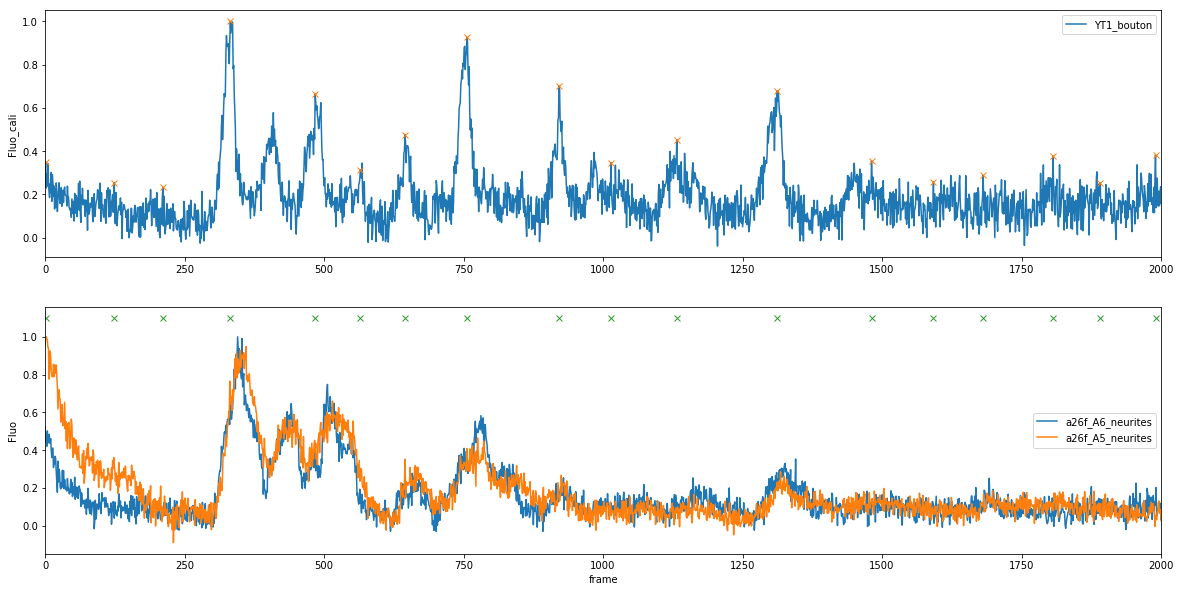

In [136]:
slice_i = 0
slice_e = 2000
plt.figure(2,figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='YT1_bouton')
plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
#plt.xlabel('frame')
plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(segments_normed.shape[0]-1):
    plt.plot(segments_normed[i+1,], label='a26f_A'+str(6-i)+'_neurites')
plt.plot(peaks_axon,[1.1,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.xlabel('frame')
plt.ylabel('Fluo')
plt.legend(loc='Best')
plt.show()

In [137]:
trace_ = trace[:]

In [138]:
peaks = peaks_axon[3:9]

In [139]:
trace_a26f.append(get_traces(peaks, segments_normed[1], 50))
trace_a31c.append(get_traces(peaks, segments_normed[0], 50))

In [140]:
len(trace_a26f)

2

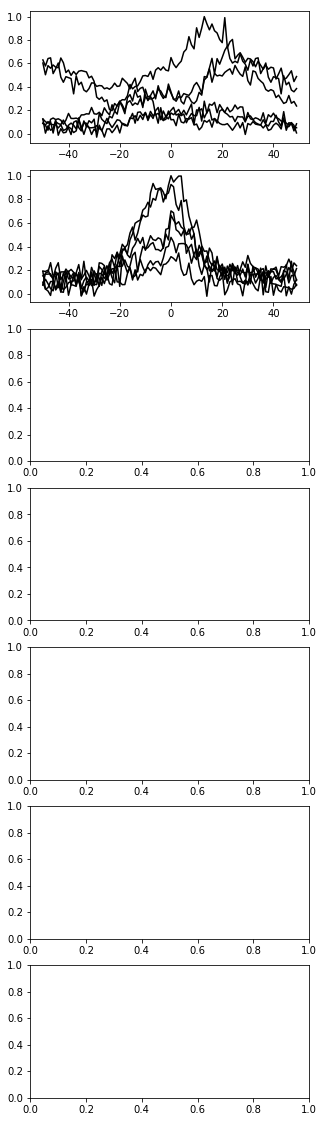

In [141]:
fig, axs = plt.subplots(7, 1,figsize=(5,20))
for num,i in enumerate(trace_a26f[1]):
        axs[0].plot(i[0],i[1], color = 'k')
for num,i in enumerate(trace_a31c[1]):
        axs[1].plot(i[0],i[1], color = 'k')
        
        #axs[0].set(ylim=(-0.02,0.15))

In [142]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200316/a26fab=45fg6m/

/media/yingtao/Liu_IO_2/imaging_2020/20200316/a26fab=45fg6m


In [143]:
segments= []
with open("Results_38.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [144]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=80, height=(0.2,1))

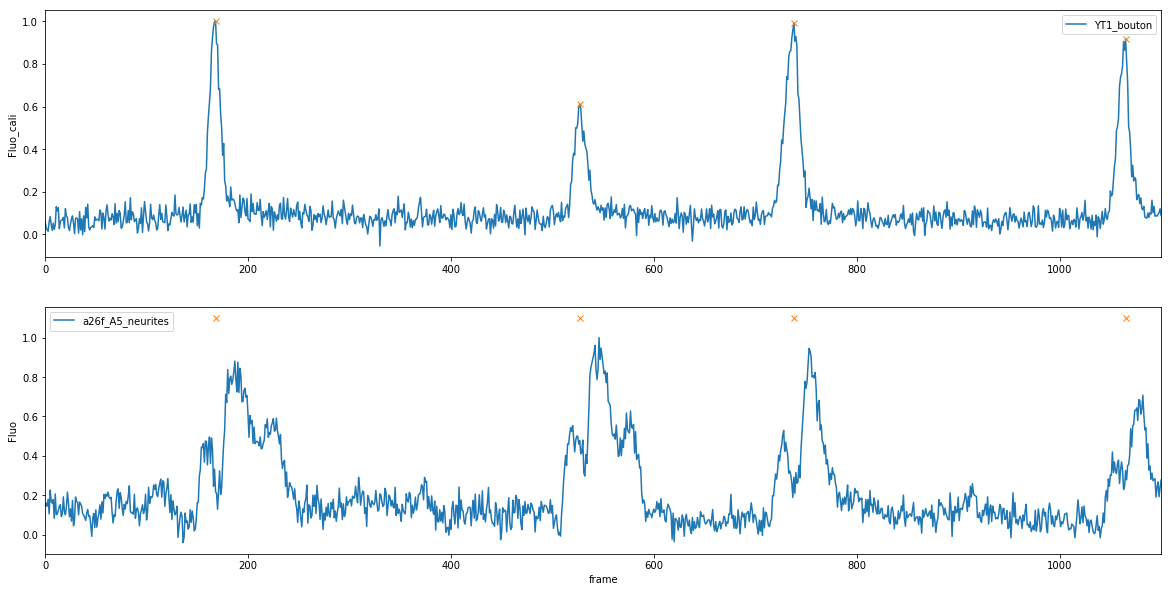

In [145]:
slice_i = 0
slice_e = 1100
plt.figure(2,figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='YT1_bouton')
plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
#plt.xlabel('frame')
plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(segments_normed.shape[0]-1):
    plt.plot(segments_normed[i+1,], label='a26f_A'+str(5-i)+'_neurites')
plt.plot(peaks_axon,[1.1,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.xlabel('frame')
plt.ylabel('Fluo')
plt.legend(loc='Best')
plt.show()

In [146]:
peaks = peaks_axon

In [147]:
trace_a26f.append(get_traces(peaks, segments_normed[1], 50))
trace_a31c.append(get_traces(peaks, segments_normed[0], 50))

In [814]:
frame_rate = 160/1155

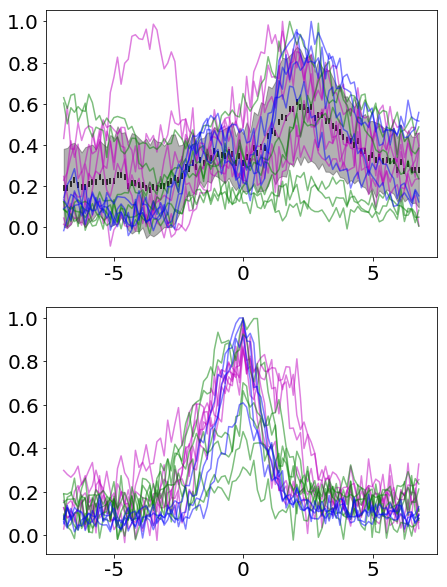

In [850]:
fig, axs = plt.subplots(2, 1,figsize=(7,10))
matplotlib.rcParams.update({'font.size': 20})
for i,c in zip(trace_a26f, ['m','g','b']):
    for trace in i:
        axs[0].plot(trace[0],trace[1], color = c, alpha=0.5)
for i,c in zip(trace_a31c, ['m','g','b']):
    for trace in i:
        axs[1].plot(trace[0],trace[1], color = c, alpha=0.5)
axs[0].fill_between(trace_average_a26f[0], trace_average_a26f[1]-trace_err_a26f, trace_average_a26f[1]+trace_err_a26f,alpha=0.3,color='k')
axs[0].scatter(trace_average_a26f[0], trace_average_a26f[1],marker ='|', color='k')  
axs[0].set_xticks((np.arange(3)*5-5)/frame_rate)
axs[0].set_xticklabels(np.arange(3)*5-5)
axs[1].set_xticks((np.arange(3)*5-5)/frame_rate)
axs[1].set_xticklabels(np.arange(3)*5-5)
plt.show()

In [842]:
trace_average_a26f[1]

array([0.19213071, 0.19198994, 0.21092181, 0.22887869, 0.20468165,
       0.1959203 , 0.19550292, 0.21077416, 0.21993591, 0.2208973 ,
       0.24363955, 0.21978434, 0.22032846, 0.22642827, 0.22371474,
       0.25361165, 0.25322904, 0.24328188, 0.20113141, 0.2141138 ,
       0.21676499, 0.20726722, 0.20772211, 0.18951354, 0.18341574,
       0.19522521, 0.19255328, 0.19981053, 0.19895758, 0.20900807,
       0.22564993, 0.23746322, 0.22845669, 0.24968124, 0.29406012,
       0.28200241, 0.31026967, 0.29333555, 0.32746625, 0.31384196,
       0.34328511, 0.33863449, 0.37091887, 0.35705947, 0.34914889,
       0.34843788, 0.36452872, 0.35826156, 0.31221795, 0.34576172,
       0.31487161, 0.34319759, 0.32253907, 0.38770138, 0.35975055,
       0.39243264, 0.3876601 , 0.44465942, 0.46841247, 0.45855913,
       0.51408195, 0.5367953 , 0.53213188, 0.57521165, 0.57391263,
       0.60938404, 0.58275441, 0.58357368, 0.57178967, 0.58237583,
       0.53304225, 0.54747074, 0.54418617, 0.51456003, 0.51737

In [830]:
trace_average_a26f = np.zeros(trace[0][0].shape)
n = 0
trace_a26f_stacked = []
for trace__ in trace_a26f:
    for trace_ in trace__:
        trace_a26f_stacked.append(trace_[1])
        trace_average_a26f = trace_average_a26f+trace_
        n += 1
trace_average_a26f = trace_average_a26f/n

In [834]:
trace_err_a26f = np.std(trace_a26f_stacked,axis=0)

In [832]:
trace_a26f_stacked

[array([ 0.04518937, -0.00544059,  0.11619525,  0.07417051,  0.02582565,
         0.08212739,  0.00176701,  0.08215229,  0.18459948,  0.29146438,
         0.40119565,  0.50312884,  0.42255665,  0.65491084,  0.72872895,
         0.82636837,  0.69516984,  0.79684268,  0.81611353,  0.9278937 ,
         0.93545494,  0.91602951,  0.91250456,  0.96245283,  0.86458708,
         0.98653239,  0.95853122,  0.85798874,  0.77003482,  0.79781092,
         0.85199543,  0.80531002,  0.60482835,  0.42868256,  0.52770158,
         0.30723229,  0.3272431 ,  0.24274969,  0.2707304 ,  0.29741876,
         0.33213365,  0.3916037 ,  0.48102158,  0.42697455,  0.39897935,
         0.52313287,  0.46163865,  0.68244988,  0.49520437,  0.59929731,
         0.486117  ,  0.733457  ,  0.58168578,  0.75529492,  0.79923309,
         0.85176437,  0.84445372,  0.98296175,  0.89302059,  0.93542733,
         0.85439209,  0.95217582,  0.86751593,  0.81646461,  0.68744113,
         0.85375639,  0.84567726,  0.7639878 ,  0.6

In [ ]:
trace_average_a26f = np.zeros(trace[0][0].shape)
n = 0
for trace__ in trace_a26f:
    for trace_ in trace__:
        trace_average_a26f = trace_average_a26f+trace_
        n += 1
trace_average_a26f = trace_average_a26f/n

In [167]:
trace_average_a31c = np.zeros(trace[0][0].shape)
n = 0
for trace__ in trace_a31c:
    for trace_ in trace__:
        trace_average_a31c = trace_average_a31c+trace_
        n += 1
trace_average_a31c = trace_average_a31c/n

[Text(0,0,'-5'), Text(0,0,'0'), Text(0,0,'5')]

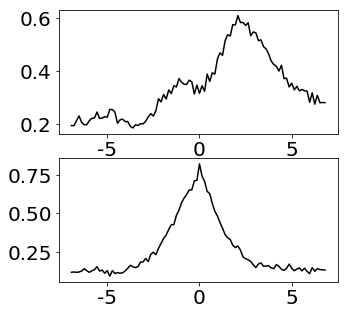

In [820]:
fig, axs = plt.subplots(2, 1,figsize=(5,5))
matplotlib.rcParams.update({'font.size': 20})
axs[0].plot(trace_average_a26f[0],trace_average_a26f[1], color = 'k')
axs[1].plot(trace_average_a31c[0],trace_average_a31c[1], color = 'k')
axs[0].set_xticks((np.arange(3)*5-5)/frame_rate)
axs[0].set_xticklabels(np.arange(3)*5-5)
axs[1].set_xticks((np.arange(3)*5-5)/frame_rate)
axs[1].set_xticklabels(np.arange(3)*5-5)

# A26f-tail

In [63]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200313/a26f-tail-45fg6m/

/media/yingtao/Liu_IO_2/imaging_2020/20200313/a26f-tail-45fg6m


In [64]:
cd liu_Dual_Fast62_20200315_142901/

/media/yingtao/Liu_IO_2/imaging_2020/20200313/a26f-tail-45fg6m/liu_Dual_Fast62_20200315_142901


In [65]:
segments= []
with open("Results_62.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [66]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=80, height=(0.2,1))

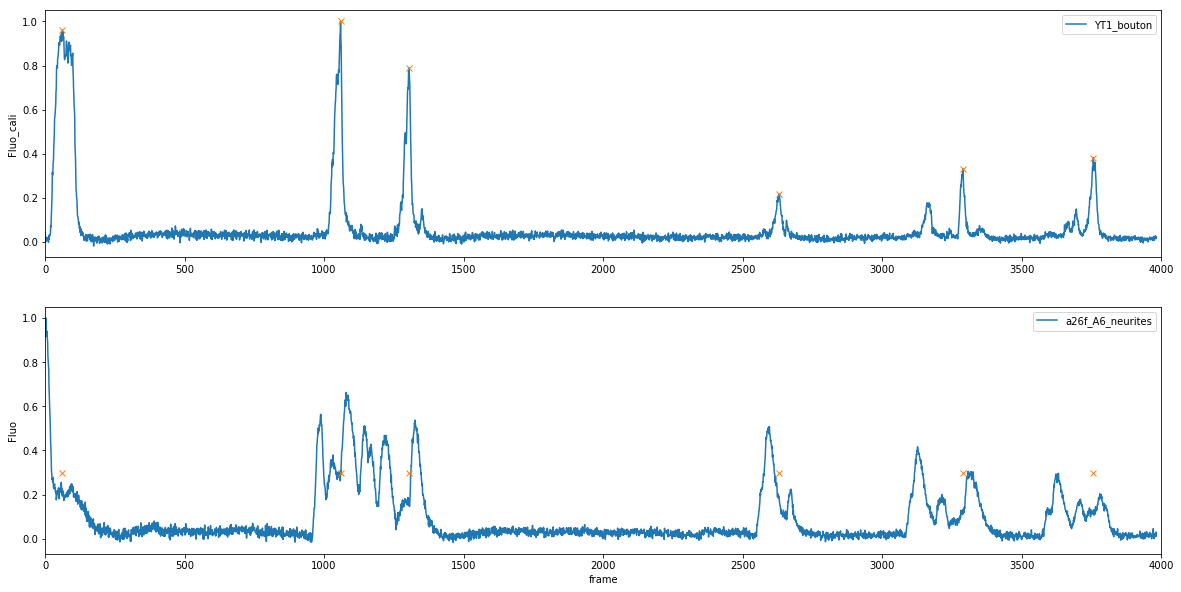

In [67]:
slice_i = 0
slice_e = 4000
plt.figure(2,figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='YT1_bouton')
plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
#plt.xlabel('frame')
plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(segments_normed.shape[0]-1):
    plt.plot(segments_normed[i+1,], label='a26f_A'+str(6-i)+'_neurites')
plt.plot(peaks_axon,[0.3,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.xlabel('frame')
plt.ylabel('Fluo')
plt.legend(loc='Best')
plt.show()

In [118]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200313/a26f-tail-45fg6m/

/media/yingtao/Liu_IO_2/imaging_2020/20200313/a26f-tail-45fg6m


In [119]:
segments= []
with open("Results_63.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [120]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=80, height=(0.2,1))

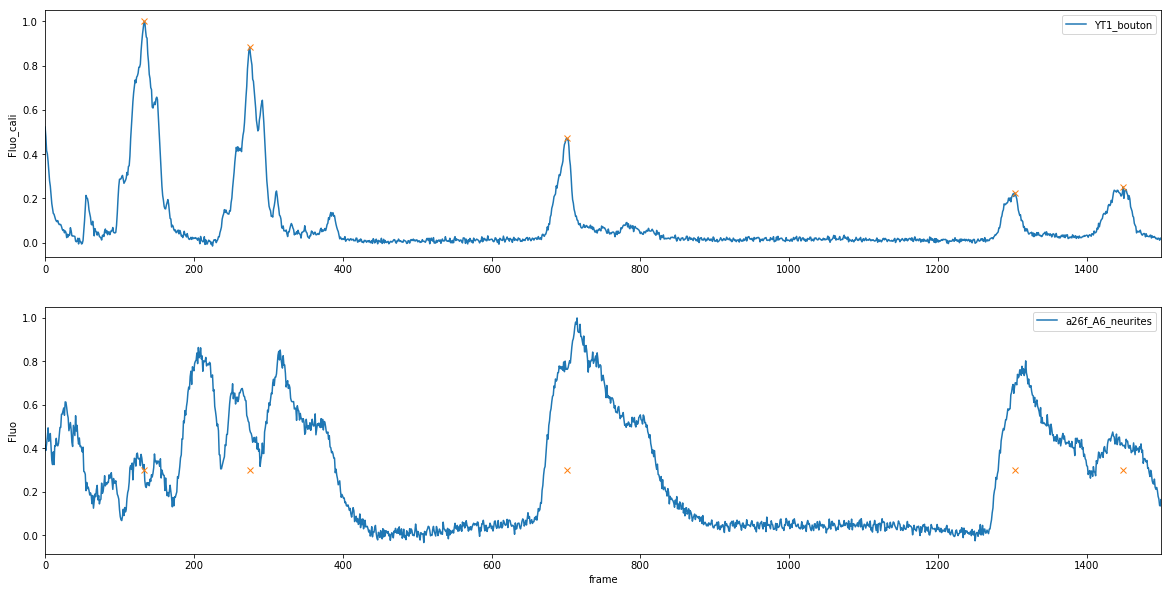

In [121]:
slice_i = 0
slice_e = 1500
plt.figure(2,figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='YT1_bouton')
plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
#plt.xlabel('frame')
plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(segments_normed.shape[0]-1):
    plt.plot(segments_normed[i+1,], label='a26f_A'+str(6-i)+'_neurites')
plt.plot(peaks_axon,[0.3,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.xlabel('frame')
plt.ylabel('Fluo')
plt.legend(loc='Best')
plt.show()

In [72]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200315/a26f-tail-45fg6m/

/media/yingtao/Liu_IO_2/imaging_2020/20200315/a26f-tail-45fg6m


In [73]:
segments= []
with open("Results_23.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [74]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=80, height=(0.2,1))

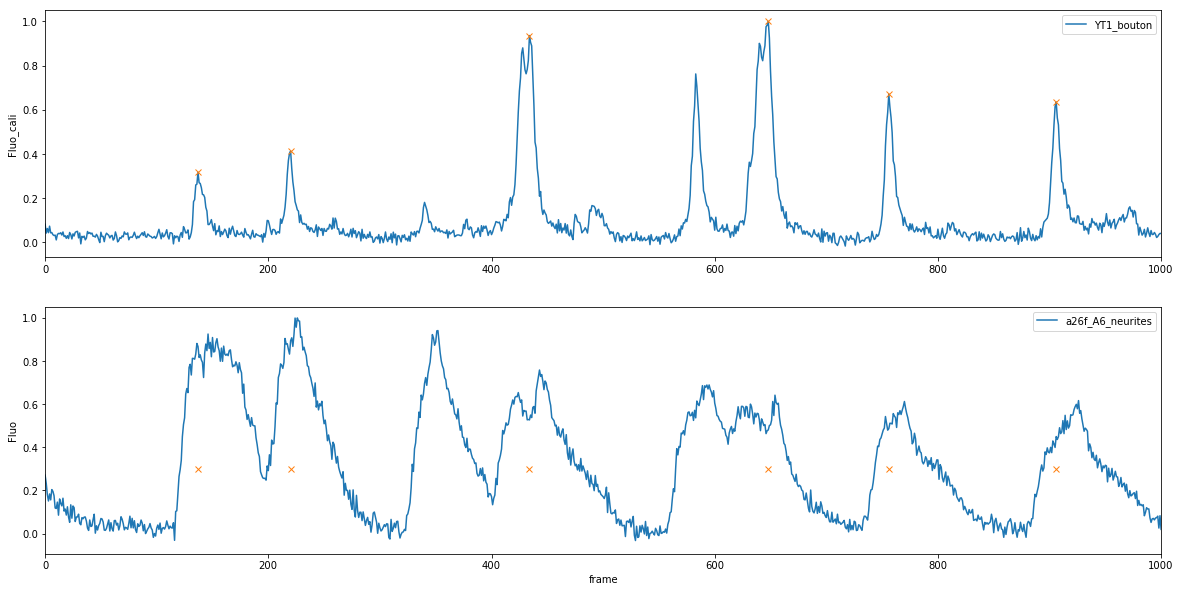

In [76]:
slice_i = 0
slice_e = 1000
plt.figure(2,figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='YT1_bouton')
plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
#plt.xlabel('frame')
plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(segments_normed.shape[0]-1):
    plt.plot(segments_normed[i+1,], label='a26f_A'+str(6-i)+'_neurites')
plt.plot(peaks_axon,[0.3,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.xlabel('frame')
plt.ylabel('Fluo')
plt.legend(loc='Best')
plt.show()

# A26f-C1B

In [783]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200322/a26f-ad-c1b/liu_dual48_20200322_204221/

/media/yingtao/Liu_IO_2/imaging_2020/20200322/a26f-ad-c1b/liu_dual48_20200322_204221


In [784]:
segments= []
with open("Results_48.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [785]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=50, height=(0.2,1))

In [786]:
last_frame = [2524,"28:52"]
first_frame = [0,"23:01"]
frame_rate = 351/2524

In [787]:
frame_rate

0.13906497622820918

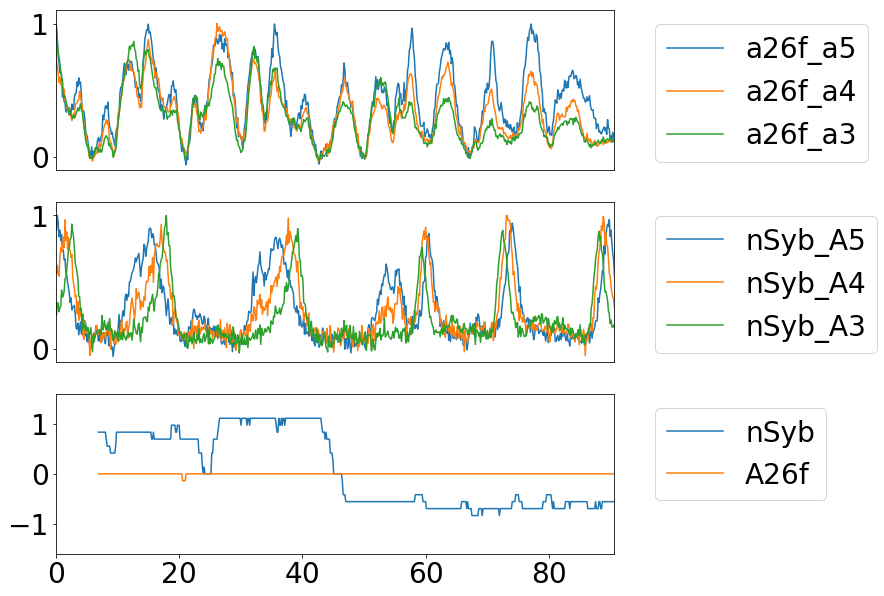

In [805]:
slice_i = 0
slice_e = 650
plt.figure(2,figsize=(10,10))
matplotlib.rcParams.update({'font.size': 28})
plt.subplot(3,1,1)
p1,=plt.plot(segments_normed[0,:], label='a26f_a5')
p2,=plt.plot(segments_normed[1,:], label='a26f_a4')
p3,=plt.plot(segments_normed[2,:], label='a26f_a3')
plt.legend(handles=[p1,p2,p3], bbox_to_anchor=(1.05, 1), loc='upper left')

#plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
plt.ylim(-0.1,1.1)
plt.xticks([])
#plt.xlabel('frame')
#plt.ylabel('Fluo_cali')
plt.subplot(3,1,2)
figs = []
for i in range(segments_normed.shape[0]-6):
    p, = plt.plot(segments_normed[i+3+2,:], label='nSyb_A'+str(7-2-i))
    figs.append(p)
#plt.plot(peaks_axon,[1000,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.ylim(-0.1,1.1)
plt.xticks([])
#plt.xlabel('frame')
#plt.ylabel('Fluo')
plt.legend(handles=figs, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(3,1,3)
p1, = plt.plot(np.arange(len(lag_A4A3_a26f))+50,-np.array(lag_A4A3) * frame_rate, label = 'nSyb')
p2, = plt.plot(np.arange(len(lag_A4A3_a26f))+50,-np.array(lag_A4A3_a26f) * frame_rate, label = 'A26f')
plt.xlim(slice_i,slice_e)
plt.ylim(-1.6,1.6)
plt.xticks(np.arange(5)*20/frame_rate,np.arange(5)*20)
#plt.xlabel('frame')
#plt.ylabel('Fluo')
plt.legend(handles=[p1, p2], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [788]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A4A3 = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[6][t_start:t_end]
    d2 = segments_normed[7][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A4A3_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A4A3.append(lag_A4A3_)

In [789]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A4A3_a26f = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[1][t_start:t_end]
    d2 = segments_normed[2][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A4A3_a26f_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A4A3_a26f.append(lag_A4A3_a26f_)

In [748]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=50, height=(0.2,1))
peaks_a5 = find_peaks(segments_normed[5], distance=50, height=(0.2,1))
peaks_a5_f = 110,256,986,1919
peaks_a5_b = 435,532,645,1220,1480

In [749]:
lags_A4A3_f = -np.array([lag_A4A3[i-50] for i in peaks_a5_f]) * frame_rate
lags_A4A3_b = -np.array([lag_A4A3[i-50] for i in peaks_a5_b]) * frame_rate
lags_A4A3_a26f_f = -np.array([lag_A4A3_a26f[i-50] for i in peaks_a5_f]) * frame_rate
lags_A4A3_a26f_b = -np.array([lag_A4A3_a26f[i-50] for i in peaks_a5_b]) * frame_rate

In [750]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A5A4 = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[5][t_start:t_end]
    d2 = segments_normed[6][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A5A4_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A5A4.append(lag_A5A4_)

In [751]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A5A4_a26f = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[0][t_start:t_end]
    d2 = segments_normed[1][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A5A4_a26f_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A5A4_a26f.append(lag_A5A4_a26f_)

In [752]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=50, height=(0.2,1))
peaks_a5 = find_peaks(segments_normed[5], distance=50, height=(0.2,1))
peaks_a5_f = 110,256,986,1919
peaks_a5_b = 435,532,645,1220,1480

In [753]:
lags_A5A4_f = -np.array([lag_A5A4[i-50] for i in peaks_a5_f]) * frame_rate
lags_A5A4_b = -np.array([lag_A5A4[i-50] for i in peaks_a5_b]) * frame_rate
lags_A5A4_a26f_f = -np.array([lag_A5A4_a26f[i-50] for i in peaks_a5_f]) * frame_rate
lags_A5A4_a26f_b = -np.array([lag_A5A4_a26f[i-50] for i in peaks_a5_b]) * frame_rate

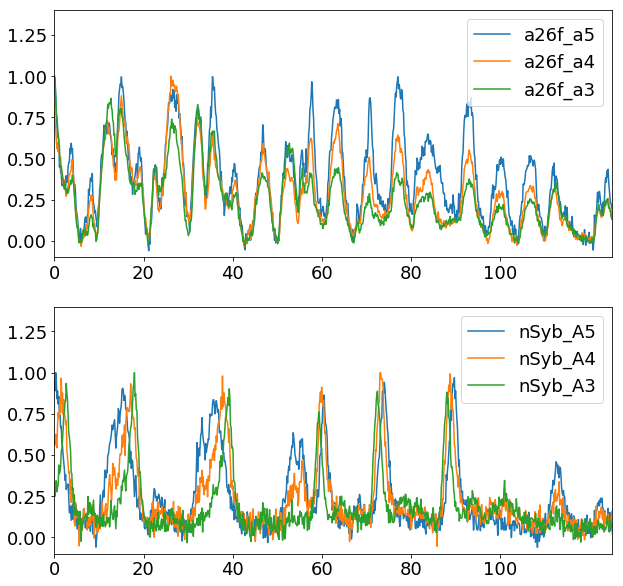

In [625]:
slice_i = 0
slice_e = 900
plt.figure(2,figsize=(10,10))
matplotlib.rcParams.update({'font.size': 18})
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='a26f_a5')
plt.plot(segments_normed[1,:], label='a26f_a4')
plt.plot(segments_normed[2,:], label='a26f_a3')

#plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
plt.ylim(-0.1,1.4)
plt.xticks(np.arange(6)*20/frame_rate,np.arange(6)*20)
#plt.xlabel('frame')
#plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(segments_normed.shape[0]-6):
    plt.plot(segments_normed[i+3+2,:], label='nSyb_A'+str(7-2-i))
#plt.plot(peaks_axon,[1000,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.ylim(-0.1,1.4)
plt.xticks(np.arange(6)*20/frame_rate,np.arange(6)*20)
#plt.xlabel('frame')
#plt.ylabel('Fluo')
plt.legend(loc='upper right')
plt.show()

In [763]:
cd /media/yingtao/Liu_IO_2/imaging_2020/20200322/a26f-ad-c1b/

/media/yingtao/Liu_IO_2/imaging_2020/20200322/a26f-ad-c1b


In [764]:
segments= []
with open("Results_49.csv") as file:
    lines = csv.reader(file)
    for i in lines:
        segments.append(i[1:])
segments = segments[1:]
segments = np.array(segments).astype(float)

segn = segments.shape[1]

segments_normed = np.empty([segn,segments.shape[0]])
for i in range(segn): 
    baseline = baseline_als(segments[:,i], 10e6, 0.001)
    segments_normed[i] = normalized((segments[:,i]-baseline) * baseline)

In [765]:
peaks_axon, _ = find_peaks(segments_normed[0], distance=50, height=(0.2,1))

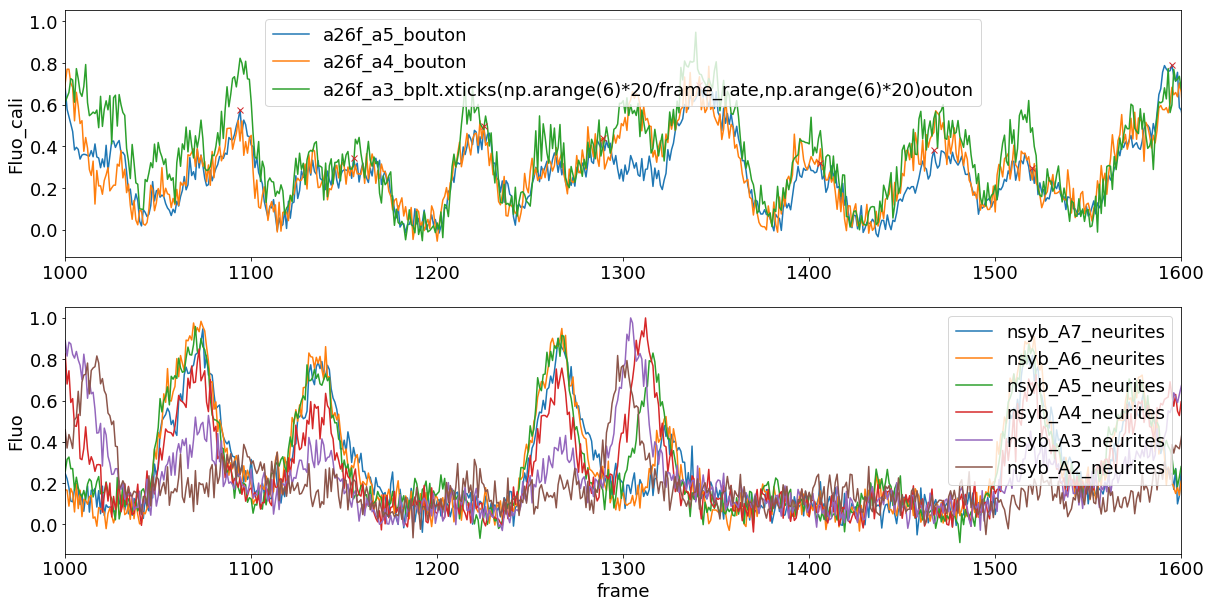

In [766]:
slice_i =1000
slice_e = 1600
plt.figure(2,figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(segments_normed[0,:], label='a26f_a5_bouton')
plt.plot(segments_normed[1,:], label='a26f_a4_bouton')
plt.plot(segments_normed[2,:], label='a26f_a3_bplt.xticks(np.arange(6)*20/frame_rate,np.arange(6)*20)outon')

plt.plot(peaks_axon, segments_normed[0,peaks_axon], "x")
plt.xlim(slice_i,slice_e)
#plt.xlabel('frame')
plt.ylabel('Fluo_cali')
plt.legend(loc='best')
plt.subplot(2,1,2)
for i in range(segments_normed.shape[0]-3):
    plt.plot(segments_normed[i+3,], label='nsyb_A'+str(7-i)+'_neurites')
#plt.plot(peaks_axon,[1000,] * len(peaks_axon), "x")
plt.xlim(slice_i,slice_e)
plt.xlabel('frame')
plt.ylabel('Fluo')
plt.legend(loc='upper right')
plt.show()

In [767]:
peaks_axon, _ = find_peaks(segments_normed[5], distance=50, height=(0.2,1))

In [768]:
peaks_axon

array([  90,  147,  247,  319,  429,  489,  621,  723,  790,  840,  890,
        974, 1070, 1130, 1202, 1267, 1319, 1382, 1436, 1518, 1572, 1638,
       1694, 1754, 1821, 1881, 2035, 2090, 2168, 2238, 2317, 2428, 2490])

In [769]:
peaks_a5_f = 723,840,974

In [770]:
peaks_a5_b = 1319,2435

In [771]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A4A3 = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[5][t_start:t_end]
    d2 = segments_normed[6][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A4A3_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A4A3.append(lag_A4A3_)

In [772]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A4A3_a26f = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[0][t_start:t_end]
    d2 = segments_normed[1][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A4A3_a26f_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A4A3_a26f.append(lag_A4A3_a26f_)

In [773]:
lags_A4A3_f_all = np.concatenate([lags_A4A3_f,-np.array([lag_A4A3[i-75] for i in peaks_a5_f]) * frame_rate])

lags_A4A3_b_all =  np.concatenate([lags_A4A3_b,-np.array([lag_A4A3[i-75] for i in peaks_a5_b]) * frame_rate])

lags_A4A3_a26f_f_all = np.concatenate([lags_A4A3_a26f_f,-np.array([lag_A4A3_a26f[i-75] for i in peaks_a5_f]) * frame_rate])

lags_A4A3_a26f_b_all = np.concatenate([lags_A4A3_a26f_b,-np.array([lag_A4A3_a26f[i-75] for i in peaks_a5_b]) * frame_rate])

In [777]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A5A4 = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[5][t_start:t_end]
    d2 = segments_normed[6][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A5A4_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A5A4.append(lag_A5A4_)

In [778]:
# Windowed time lagged cross correlation
window_size = 150 #samples
t_start = 0
t_end = t_start + window_size
step_size = 1
lag_A5A4_a26f = []
while t_end < segments_normed[0].shape[0]:
    d1 = segments_normed[0][t_start:t_end]
    d2 = segments_normed[1][t_start:t_end]
    corr = np.correlate(d1 - np.mean(d1), 
                    d2 - np.mean(d2),
                    mode='full')
    lag_A5A4_a26f_ = corr.argmax() - (len(d1) - 1)
    t_start = t_start + step_size
    t_end = t_end + step_size
    lag_A5A4_a26f.append(lag_A5A4_a26f_)

In [779]:
lags_A5A4_f_all = np.concatenate([lags_A5A4_f,-np.array([lag_A5A4[i-75] for i in peaks_a5_f]) * frame_rate])

lags_A5A4_b_all =  np.concatenate([lags_A5A4_b,-np.array([lag_A5A4[i-75] for i in peaks_a5_b]) * frame_rate])

lags_A5A4_a26f_f_all = np.concatenate([lags_A5A4_a26f_f,-np.array([lag_A5A4_a26f[i-75] for i in peaks_a5_f]) * frame_rate])

lags_A5A4_a26f_b_all = np.concatenate([lags_A5A4_a26f_b,-np.array([lag_A5A4_a26f[i-75] for i in peaks_a5_b]) * frame_rate])

([<matplotlib.axis.XTick at 0x7fed0d495e10>,
 <a list of 6 Text xticklabel objects>)

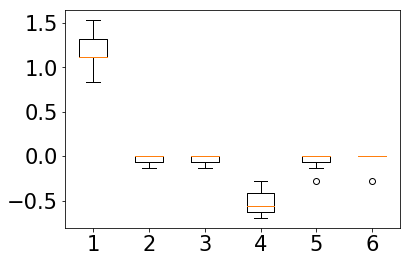

In [811]:
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams.update({'font.size': 21})
# basic plot
plt.boxplot([lags_A5A4_f_all,lags_A5A4_a26f_f_all,lags_A4A3_a26f_f_all,lags_A5A4_b_all,lags_A5A4_a26f_b_all,lags_A4A3_a26f_b_all])
#plt.xlabel('frequency of skid')
plt.xticks([1,2,3,4,5,6])